In [ ]:
**PROJECT:LINEAR REGRESSION MODEL**

In [1]:
import pandas as pm
import numpy as nm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.express as px
import plotly.graph_objects as go

DATA COLLECTION:

In [4]:
dm=pm.read_csv('Housing.csv')

In [5]:
dm.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
dm.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


BASIC DATA ANALYSIS:

In [7]:
dm.shape


(545, 13)

In [8]:
dm.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
dm.isnull().sum()*100/dm.shape[0]


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [10]:
dm.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
dm.dtypes


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


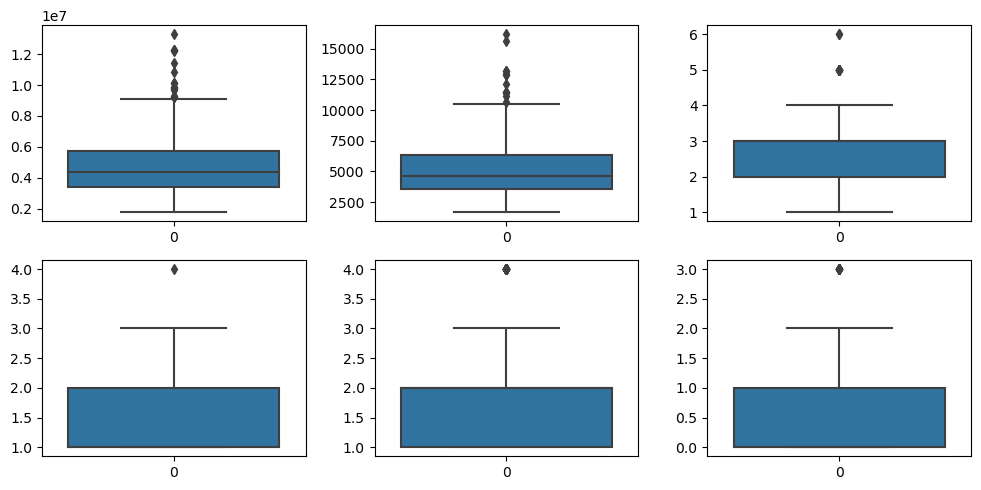

In [15]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(dm['price'], ax = axs[0,0])
plt2 = sns.boxplot(dm['area'], ax = axs[0,1])
plt3 = sns.boxplot(dm['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(dm['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(dm['stories'], ax = axs[1,1])
plt3 = sns.boxplot(dm['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x211304837d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2113029ec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21130483090>],
 'medians': [<matplotlib.lines.Line2D at 0x21130495750>],
 'fliers': [<matplotlib.lines.Line2D at 0x21130424450>],
 'means': []}

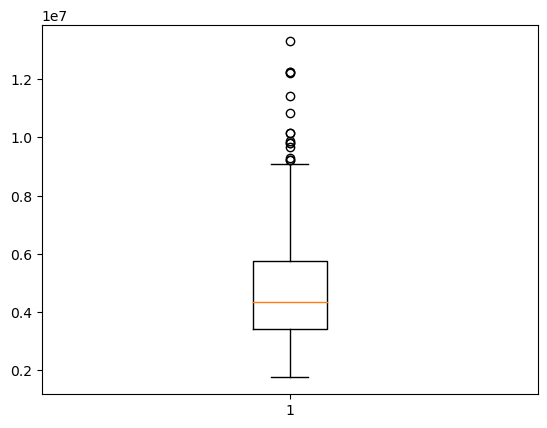

In [16]:
plt.boxplot(dm.price)


In [17]:
Q1 = dm.price.quantile(0.25)
Q3 = dm.price.quantile(0.75)

In [18]:
IQR = Q3 - Q1
housing = dm[(dm.price >= Q1 - 1.5*IQR) & (dm.price <= Q3 + 1.5*IQR)]

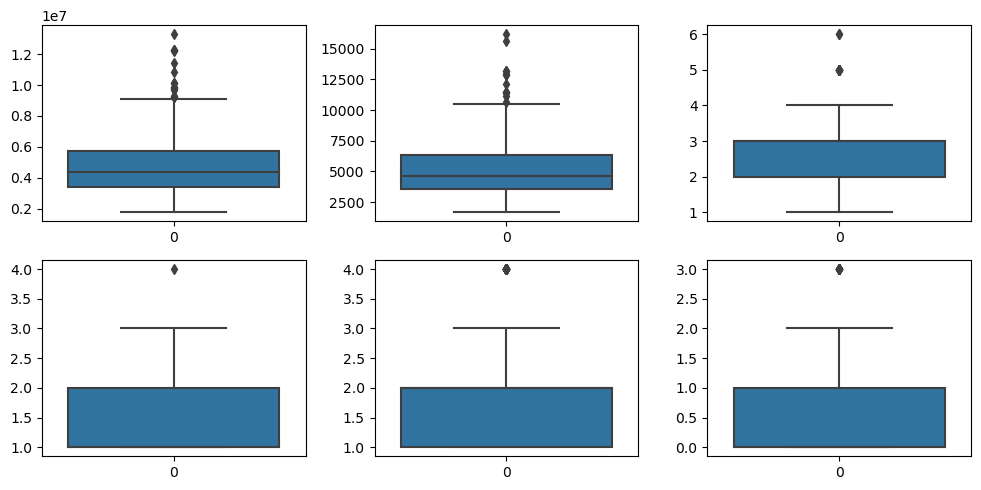

In [19]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(dm['price'], ax = axs[0,0])
plt2 = sns.boxplot(dm['area'], ax = axs[0,1])
plt3 = sns.boxplot(dm['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(dm['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(dm['stories'], ax = axs[1,1])
plt3 = sns.boxplot(dm['parking'], ax = axs[1,2])

plt.tight_layout()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


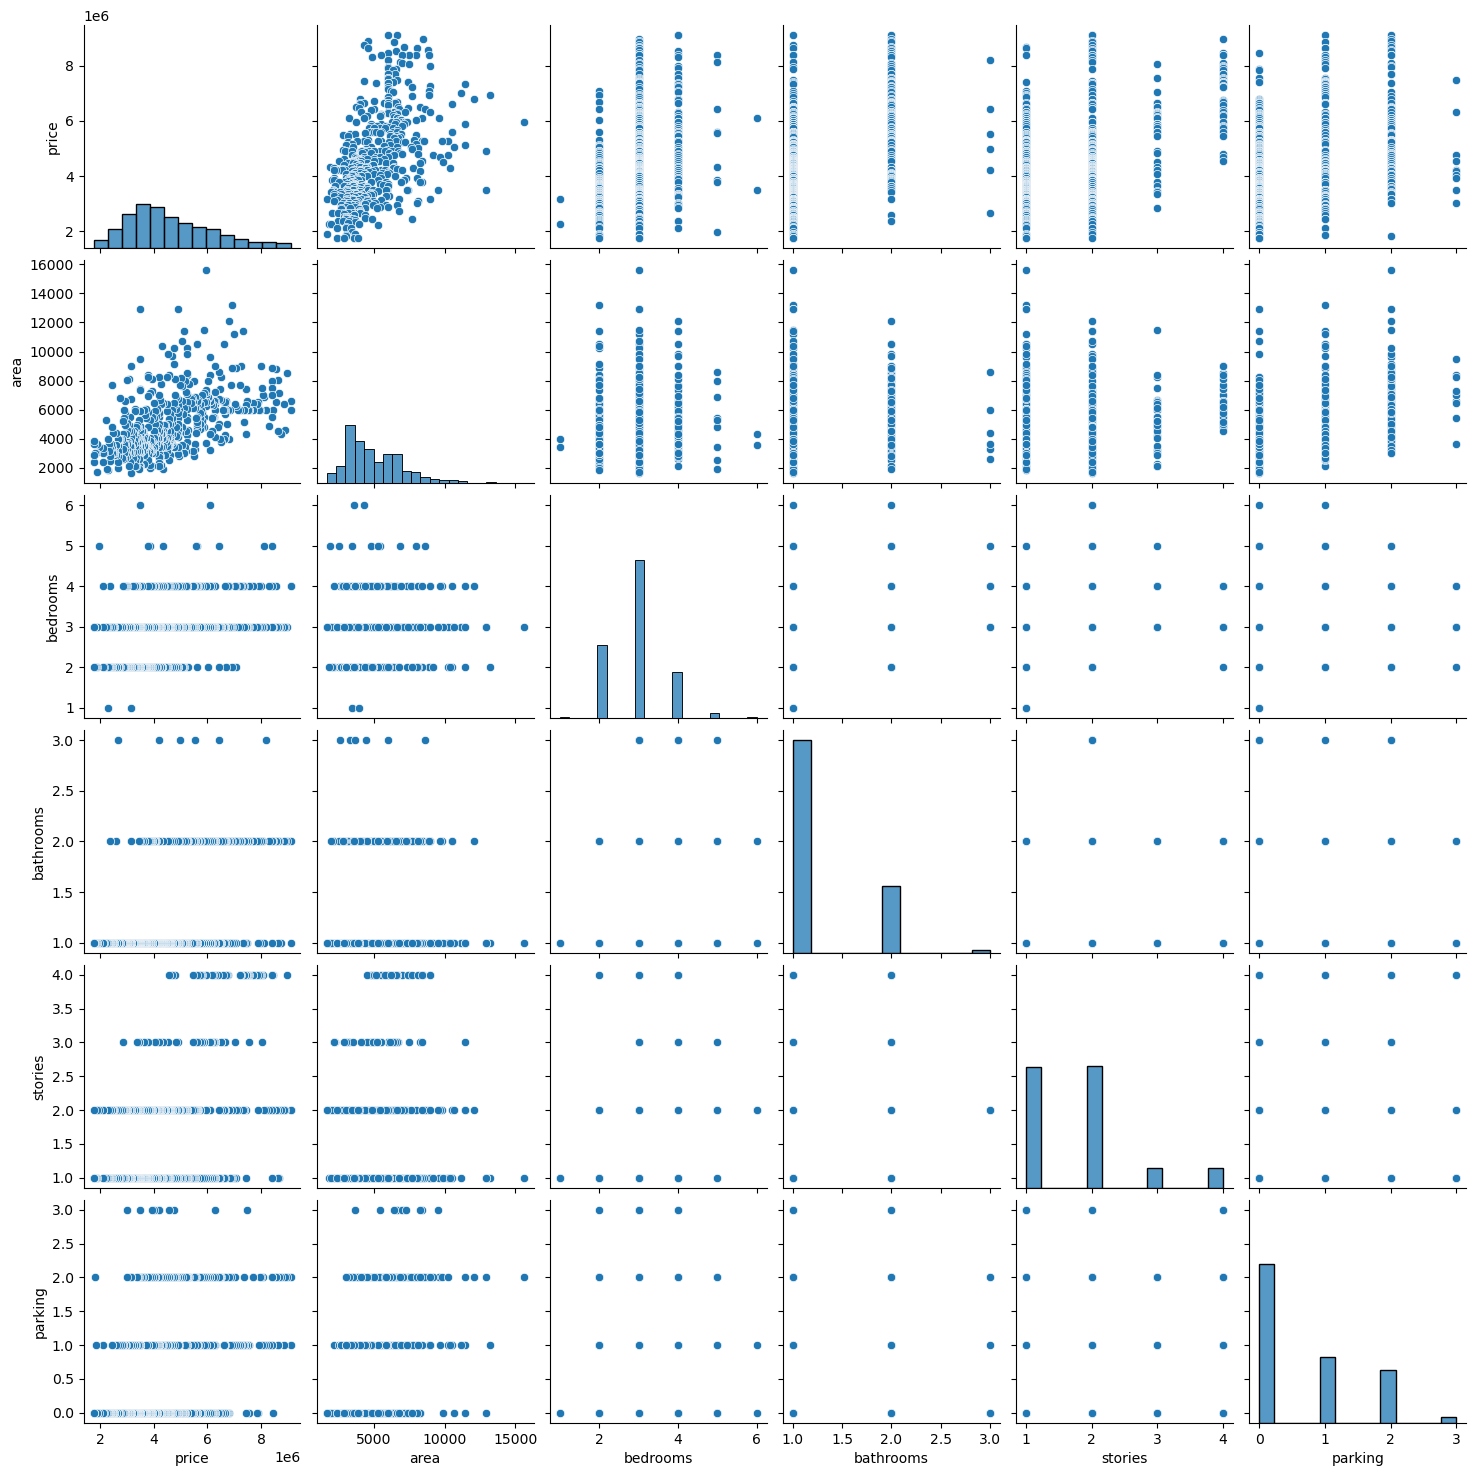

In [20]:
sns.pairplot(housing)
plt.show()

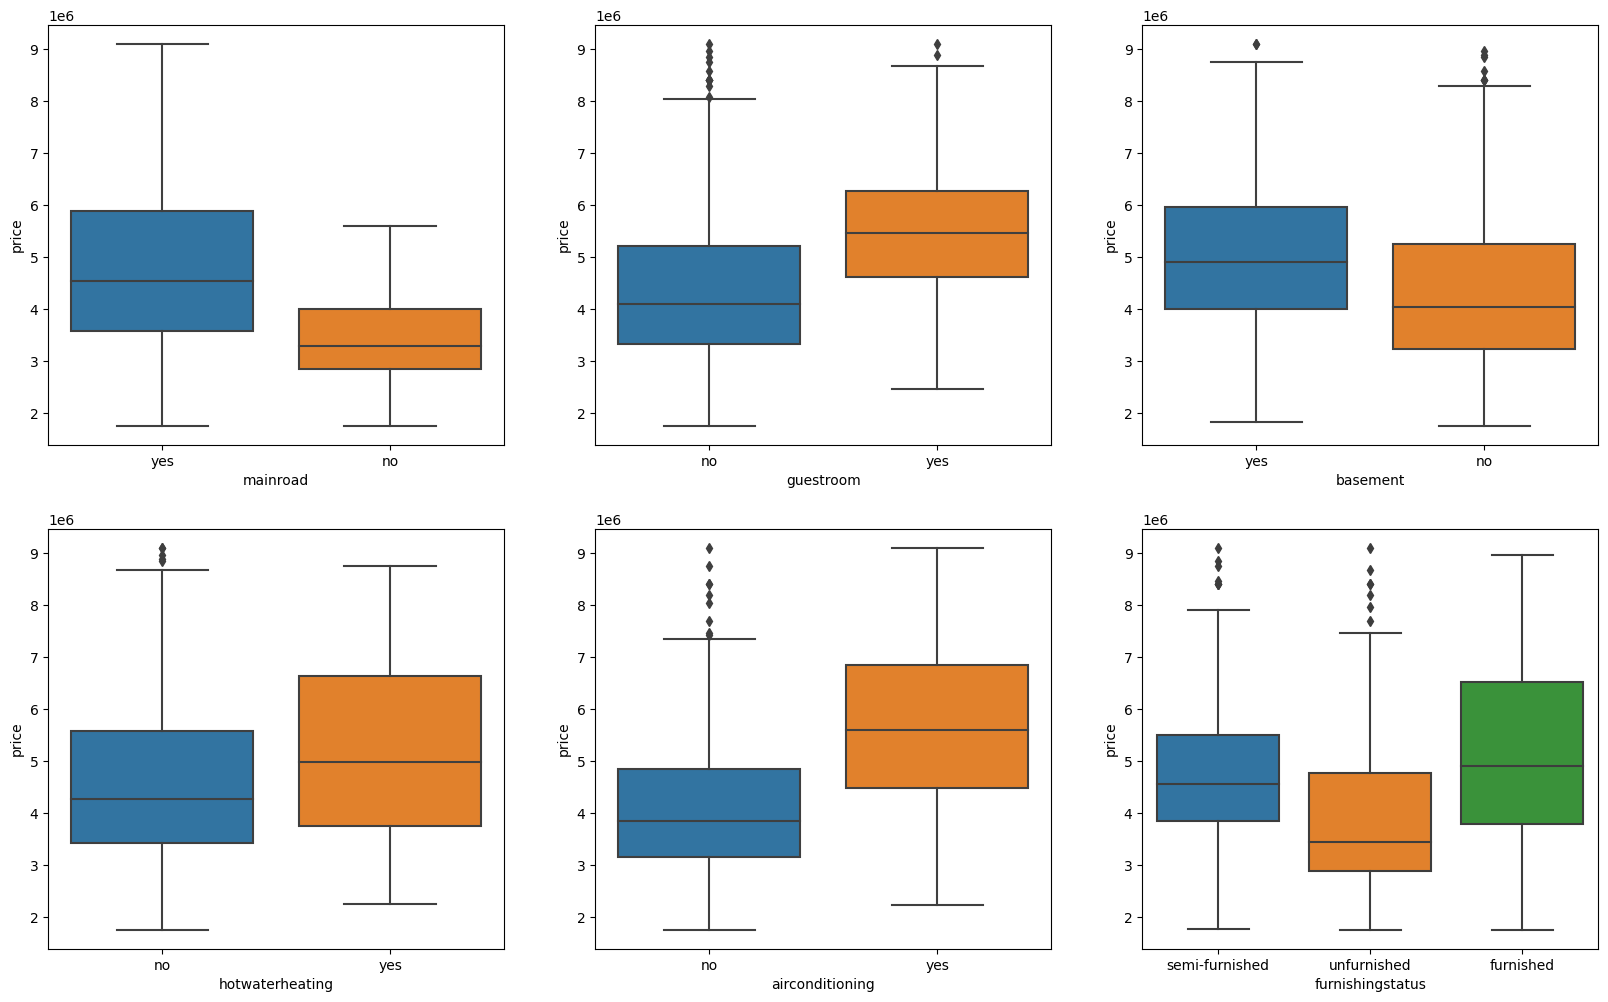

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

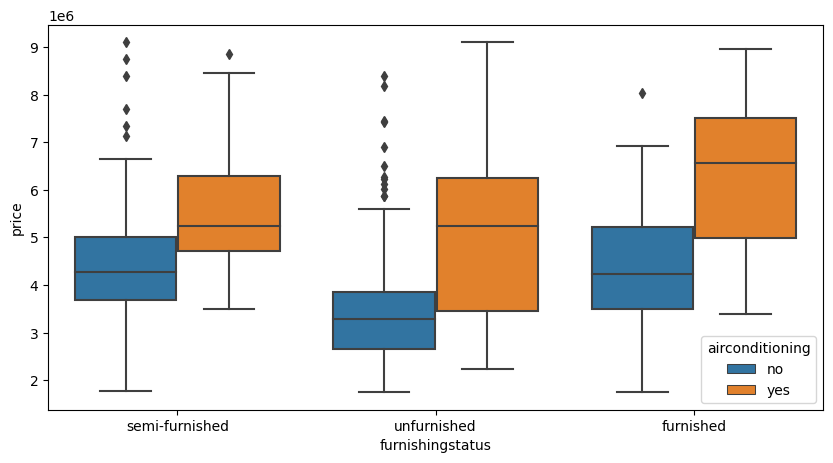

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

Model Building:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
X = dm[['area', 'bedrooms', 'bathrooms']]
y = dm['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [30]:

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2750040479309.0513
R-squared: 0.45592991188724474


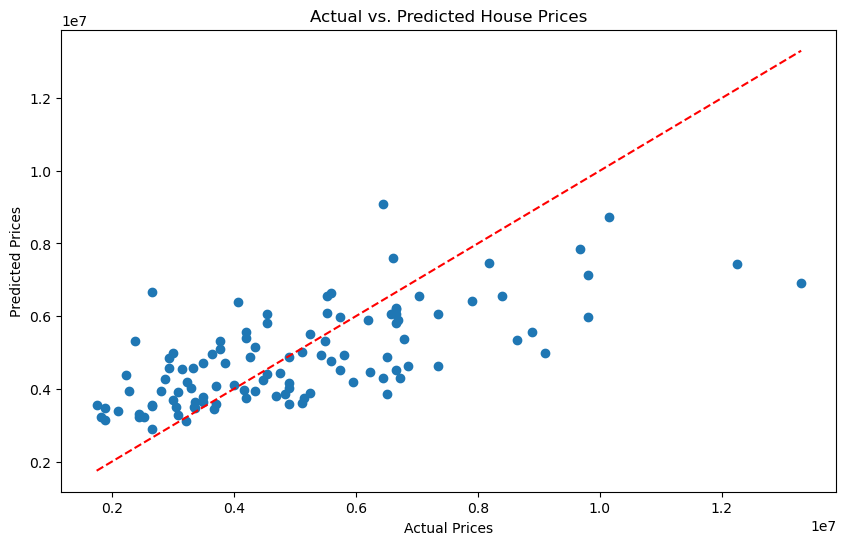

In [31]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()